## LA Parking Citation Exploratory Data Analysis


#### Fisher Ankney
#### October 27th, 2018

<br> 

data avaliable on Kaggle or https://data.lacity.org/

This goal of this notebook understand relationships with date and time.

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

### Combine Datasets

In [2]:
# load individual sets
la_ticket_2017_1 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_1.csv")
la_ticket_2017_2 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_2.csv")
la_ticket_2017_3 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_3.csv")
la_ticket_2017_4 = pd.read_csv("~/Documents/data_science/py_la_tickets/input/la_ticket_2017_4.csv")

In [3]:
# combine dataset
la_ticket_2017 = pd.concat([la_ticket_2017_1, la_ticket_2017_2, la_ticket_2017_3, la_ticket_2017_4])

In [4]:
# view dataset
la_ticket_2017.head()

,Unnamed: 0,Issue time,Meter Id,RP State Plate,Make,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude,Month,Day
0,2777524,104.0,NaN,OR,TOYT,BL,1822 WINONA BLVD,80.56E4+,RED ZONE,93.0,6.470239e+06,1.860397e+06,3,1
1,2777558,1050.0,NaN,CA,HOND,BK,710 EL CENTRO AV,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,3,28
2,2827647,115.0,NaN,CA,HOND,GY,7502 WILLIS AVENUE,22500E,BLOCKING DRIVEWAY,68.0,6.424012e+06,1.897916e+06,1,3
3,2827648,126.0,NaN,CA,FORD,WT,14957 FRIAR STREET,5204A-,DISPLAY OF TABS,25.0,6.422948e+06,1.890266e+06,1,3
4,2827649,132.0,NaN,CA,HOND,BK,14634 SYLVAN ST,22514,FIRE HYDRANT,68.0,6.425072e+06,1.889888e+06,1,3


In [5]:
len(la_ticket_2017)

2254329

### Create Nth Day of the Year Variable

In [6]:
month_day = la_ticket_2017[['Month', 'Day']]
month_day.head()

,Month,Day
0,3,1
1,3,28
2,1,3
3,1,3
4,1,3


In [7]:
combined = '2017/' + month_day.loc[:,'Month'].map(str) + '/' + month_day.loc[:,'Day'].map(str)
combined.head()

0     2017/3/1
1    2017/3/28
2     2017/1/3
3     2017/1/3
4     2017/1/3
dtype: object

In [8]:
date_series = pd.to_datetime(combined, format='%Y/%m/%d')#month_day['Combined'], format='%Y/%m/%d')
date_series.head()

0   2017-03-01
1   2017-03-28
2   2017-01-03
3   2017-01-03
4   2017-01-03
dtype: datetime64[ns]

In [9]:
doy = date_series.dt.dayofyear
doy.head()

0    60
1    87
2     3
3     3
4     3
dtype: int64

In [10]:
min(doy)

1

In [11]:
max(doy)

365

In [12]:
len(np.unique(doy))

365

In [13]:
la_ticket_2017['Day of Year'] = doy
la_ticket_2017.head()

,Unnamed: 0,Issue time,Meter Id,RP State Plate,Make,Color,Location,Violation code,Violation Description,Fine amount,Latitude,Longitude,Month,Day,Day of Year
0,2777524,104.0,NaN,OR,TOYT,BL,1822 WINONA BLVD,80.56E4+,RED ZONE,93.0,6.470239e+06,1.860397e+06,3,1,60
1,2777558,1050.0,NaN,CA,HOND,BK,710 EL CENTRO AV,4000A1,NO EVIDENCE OF REG,50.0,9.999900e+04,9.999900e+04,3,28,87
2,2827647,115.0,NaN,CA,HOND,GY,7502 WILLIS AVENUE,22500E,BLOCKING DRIVEWAY,68.0,6.424012e+06,1.897916e+06,1,3,3
3,2827648,126.0,NaN,CA,FORD,WT,14957 FRIAR STREET,5204A-,DISPLAY OF TABS,25.0,6.422948e+06,1.890266e+06,1,3,3
4,2827649,132.0,NaN,CA,HOND,BK,14634 SYLVAN ST,22514,FIRE HYDRANT,68.0,6.425072e+06,1.889888e+06,1,3,3


### Visualize DOY

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15c652208>]],
      dtype=object)

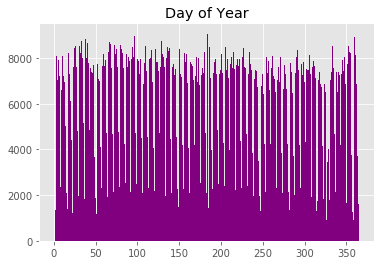

In [14]:
la_ticket_2017.hist('Day of Year', bins=365, color = 'purple')

In [15]:
len(la_ticket_2017)/365

6176.243835616438

In [16]:
# la_ticket_2017.plot.scatter(x = 'Day of Year', y = 'Fine amount')
# plt.scatter?

# print df.groupby(by=['name','day']).sum().groupby(level=[0]).cumsum()

#df.groupby('id')['val'].cumsum()

sum_fine_by_day = la_ticket_2017.groupby('Day of Year')['Fine amount'].sum()

#plt.scatter(sum_fine_by_day)
#plt.(sum_fine_by_day, bins = 365)

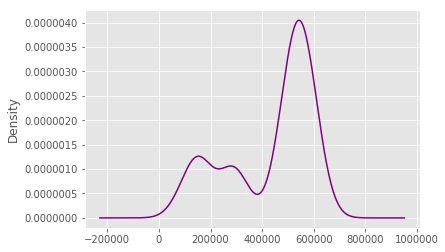

In [28]:
sum_fine_by_day.plot.density(color = 'purple')

In [18]:
min(sum_fine_by_day)

66175.0

In [19]:
np.mean(sum_fine_by_day)

434094.1369863014

In [20]:
max(sum_fine_by_day)

656276.0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123bd1780>]],
      dtype=object)

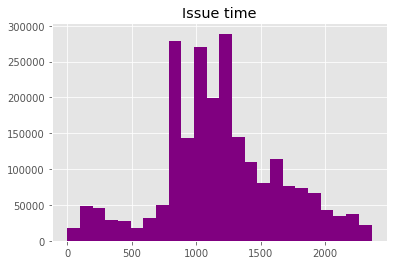

In [27]:
la_ticket_2017.hist('Issue time', bins=24, color = 'purple')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x125e956a0>]],
      dtype=object)

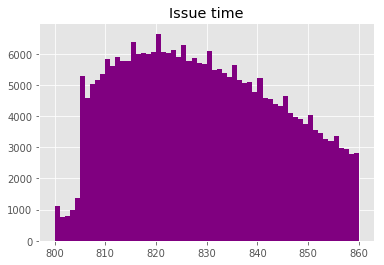

In [41]:
la_ticket_2017.hist('Issue time', range=(800, 860), bins=60, color = 'purple')

In [43]:
tickets_by_day = la_ticket_2017.groupby('Day of Year')

,Unnamed: 0,Issue time,RP State Plate,Violation code,Fine amount,Latitude,Longitude,Month,Day
Day of Year,,,,,,,,,
1,3498298,20.0,AL,000,25.0,99999.0,99999.0,1,1
2,3497841,2.0,AZ,002,25.0,99999.0,99999.0,1,2
3,2827647,15.0,AB,000,10.0,99999.0,99999.0,1,3
4,3497866,3.0,AB,000,10.0,99999.0,99999.0,1,4
5,3497980,5.0,AB,000,10.0,99999.0,99999.0,1,5
6,3497797,2.0,AL,010,25.0,99999.0,99999.0,1,6
7,3497853,1.0,AL,007,25.0,99999.0,99999.0,1,7
8,3497836,2.0,AB,000,25.0,99999.0,99999.0,1,8
9,3497783,3.0,AL,000,10.0,99999.0,99999.0,1,9


In [1]:
la_ticket_2017#.'Day of Year', bins=365, color = 'purple')

NameError: name 'la_ticket_2017' is not defined